Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega el dataset
data = pd.read_csv("/home/sole/Downloads/preu lloguer per trimestre i barri.csv")
print(data.head())

    Any  Trimestre  Codi_Districte Nom_Districte  Codi_Barri  \
0  2021          1               1  Ciutat Vella           1   
1  2021          1               1  Ciutat Vella           2   
2  2021          1               1  Ciutat Vella           3   
3  2021          1               1  Ciutat Vella           4   
4  2021          1               2      Eixample           5   

                               Nom_Barri                      Lloguer_mitja  \
0                               el Raval  Lloguer mitjà mensual (Euros/mes)   
1                         el Barri Gòtic  Lloguer mitjà mensual (Euros/mes)   
2                         la Barceloneta  Lloguer mitjà mensual (Euros/mes)   
3  Sant Pere, Santa Caterina i la Ribera  Lloguer mitjà mensual (Euros/mes)   
4                          el Fort Pienc  Lloguer mitjà mensual (Euros/mes)   

    Preu  
0  759.2  
1  929.6  
2  808.9  
3  879.4  
4  918.0  


In [54]:
# mirem que tot vagi bé, com està fet aquest dataframe i si hi ha valors buits
print(data.info())
print(data.shape)
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB
None
(584, 8)
Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64


In [55]:
#Després de llegir les columnes que hi ha, vull treure 'Codi_barri' i 'Codi Districte' perquè els gràfics que construit siguin més llegibles. 
data.drop(['Codi_Districte', 'Codi_Barri'], axis=1, inplace=True)

In [56]:
#Verificar que jo no hi son
print(data.head())

    Any  Trimestre Nom_Districte                              Nom_Barri  \
0  2021          1  Ciutat Vella                               el Raval   
1  2021          1  Ciutat Vella                         el Barri Gòtic   
2  2021          1  Ciutat Vella                         la Barceloneta   
3  2021          1  Ciutat Vella  Sant Pere, Santa Caterina i la Ribera   
4  2021          1      Eixample                          el Fort Pienc   

                       Lloguer_mitja   Preu  
0  Lloguer mitjà mensual (Euros/mes)  759.2  
1  Lloguer mitjà mensual (Euros/mes)  929.6  
2  Lloguer mitjà mensual (Euros/mes)  808.9  
3  Lloguer mitjà mensual (Euros/mes)  879.4  
4  Lloguer mitjà mensual (Euros/mes)  918.0  


In [57]:
# Passem al resum estadístic
print(data.describe())

          Any   Trimestre
count   584.0  584.000000
mean   2021.0    2.500000
std       0.0    1.118992
min    2021.0    1.000000
25%    2021.0    1.750000
50%    2021.0    2.500000
75%    2021.0    3.250000
max    2021.0    4.000000


In [58]:
# convertimos el tipo de 'preu' de object a float, para poder tener un valor numérico
data = data['Preu'].astype(float)

ValueError: could not convert string to float: '--'

Per l'error en l'execució de la conversió, podem comprovar que en el camp 'preu' tenim alguns registres amb valor '--'.

In [59]:
#Contabilitzem el número de registres que tenen aquest valor
data[data['Preu'] =='--' ]['Nom_Districte'].count()

44

In [60]:
#Comprovem si hi ha alguna relació dels diferents camps amb els camps amb 'Preu' amb valor '--'.
data[data['Preu'] =='--'].sort_values(by='Nom_Barri')

,Any,Trimestre,Nom_Districte,Nom_Barri,Lloguer_mitja,Preu
130,2021,1,Sant Andreu,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),--
349,2021,3,Sant Andreu,Baró de Viver,Lloguer mitjà mensual (Euros/mes),--
57,2021,1,Sant Andreu,Baró de Viver,Lloguer mitjà mensual (Euros/mes),--
422,2021,3,Sant Andreu,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),--
265,2021,2,Nou Barris,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
411,2021,3,Nou Barris,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
192,2021,2,Nou Barris,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
119,2021,1,Nou Barris,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
338,2021,3,Nou Barris,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
46,2021,1,Nou Barris,Can Peguera,Lloguer mitjà mensual (Euros/mes),--


Després de realitzar una exploració visual de les dades, he observat que els registres amb 'Preu' == '--' corresponen a cinc barris (Can Peguera, Torre Baró, Vallbona, Clota i Marina del Prat Vermell), així com als trimestres 1 i 3 del barri de Baró de Viver.
He identificat una disjuntiva en el procés d'anàlisi de dades. Per obtenir valors numèrics basats en el camp 'Preu', cal convertir aquest camp al tipus de dades float, però fer-ho implicaria eliminar els registres amb el camp 'Preu' a '--'. No obstant això, eliminar aquests registres també significaria la pèrdua de dades d'enters barris dins de cada districte, la qual cosa afectaria la representació de la informació sobre els barris als districtes.
Com a solució a aquesta disjuntiva, he decidit primer generar la gràfica de barris per districte com es demana en el primer punt de l'exercici, i posteriorment, eliminar els registres amb 'Preu' == '--'. Això permetrà obtenir una representació visual dels barris als districtes abans de realitzar cap neteja de dades.

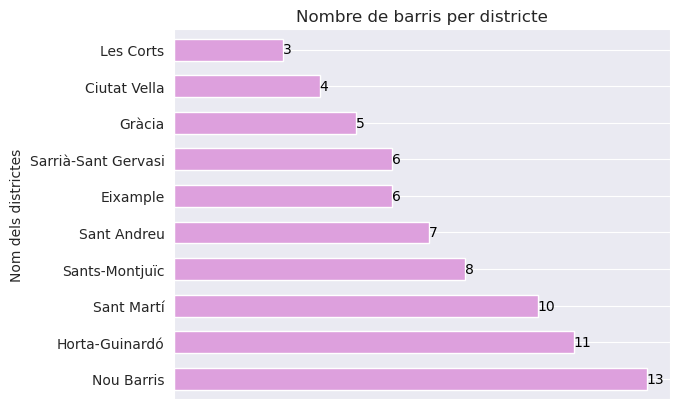

<Figure size 640x480 with 0 Axes>

In [61]:
# Nombre de barris per districte : una variable categòrica (Districte o Barri)
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/home/sole/Downloads/preu lloguer per trimestre i barri.csv")

ax= data[['Nom_Districte','Nom_Barri']].drop_duplicates(subset = 'Nom_Barri').groupby("Nom_Districte")['Nom_Barri'].count().sort_values(ascending=False).plot(kind ='barh',color='plum',width=0.6)
ax.bar_label(ax.containers[0], fontsize=10, color='black', label_type='edge')
ax.set_xticks([])
plt.xlabel('')
plt.ylabel('Nom dels districtes')
plt.title('Nombre de barris per districte')
plt.show()
#desar l'imatge
plt.savefig("Nombre_barris_per_districte.jpg",bbox_inches='tight' )

Podem comprovar que el districte amb més barris és el districte de Nou Barris, amb 13 i el que menys en té, el districte de Les Corts amb 3, una quarta part dels que existeixen a Nou Barris.

In [62]:
# Netejem el dataframe els valors '--' de 'Preu'
data = data.loc[data['Preu'] != '--']
data[data['Preu'] =='--' ]['Nom_Districte'].count()

0

In [63]:
# Ara si podem realitzar la conversió de tipus al camp 'Preu'
data['Preu']= data['Preu'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB


In [64]:
# Una variable numèrica (preu)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# He escollit la figura del violí per visualitzar de forma interactiva els valors que obtenim amb la funció .describe(), i aixi veure gràficament la distribució del preu mitjà del m2/mes als diferents districtes, tmb podem veure la resta de valors i el seu kde(kernel density estimation).

fig = go.Figure(data=go.Violin(
    y=data.loc[data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']['Preu'],
    box_visible=True,
    line_color='black',
    meanline_visible=True,
    fillcolor='darkcyan',
    opacity=0.8,
    x0='Preu en € per m2/mes'
))

fig.update_layout(
    title="Distribució del preu mitjà del m2 a Barcelona",
    xaxis_title="",
    yaxis_title="",
    yaxis_zeroline=False
)
plt.savefig("distribucio_preu_mitja.png", dpi=300)  

fig.show()

<Figure size 640x480 with 0 Axes>

De la gràfica podem observar de forma visual i interactiva, que el preu mínim per m2 correspon a 6.70 euros m2/mes i el màxim 18 euros m2/mes. La mitjana és de 12.72 euros m2/mes. El valor de kde assoleix la seva densitat màxima en els 12,95 m2/mes, cosa que ens indica que la probabilitat que un nou valor aquest proper a aquest preu és molt alta.

In [65]:
#mateix resum pero amb .describe()s
data.loc[data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']['Preu'].describe()

count    270.000000
mean      12.720741
std        1.701480
min        6.700000
25%       11.625000
50%       12.750000
75%       13.600000
max       18.000000
Name: Preu, dtype: float64

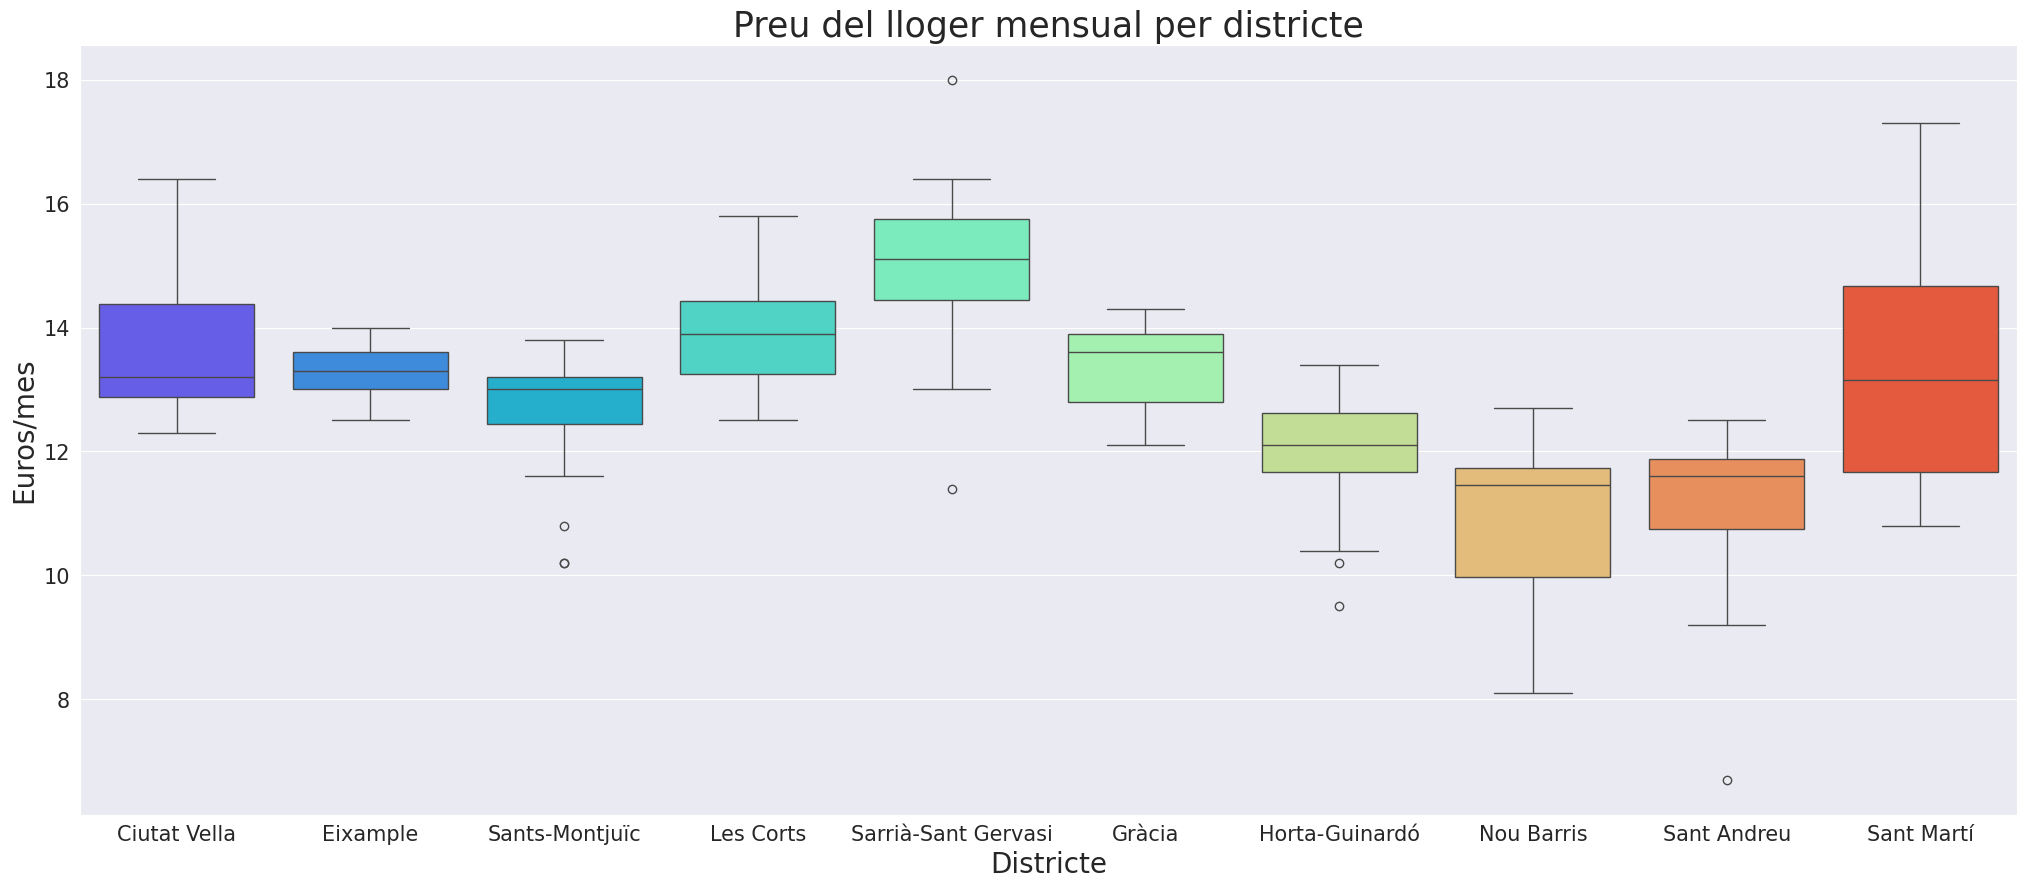

In [66]:
# Una variable numèrica i una categòrica (Districte i Preu)
# En este caso utilizaremos el precio de alquiler mensual para realizar la gráfica
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data based on 'Lloguer_mitja'
filtered_data = data[data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']

plt.figure(figsize=(25, 10))
g = sns.boxplot(x='Nom_Districte', y='Preu', hue='Nom_Districte', data=filtered_data, palette='rainbow', dodge=False)
g.set_title('Preu del lloger mensual per districte', fontsize=25)
g.set_xlabel('Districte', fontsize=20)
g.set_ylabel('Euros/mes', fontsize=20)
g.tick_params(labelsize=15)

plt.savefig("Preu_lloger_mensual_per_districte.jpg",bbox_inches='tight')

plt.show()

En aquest cas utilitzem el preu mensual i el distribuïm pels diferents districtes de la ciutat. Podem veure que els valors més alts corresponen al districte de Sarrià-Sant Gervasi i els més baixos al districte de Nou Barris i Sant Andreu (hem de tenir en compte que dins d'aquestes dades falten 3 barris de Nou Barris i 1 de Sant Andreu, però que possiblement no n'haurien modificat la distribució).


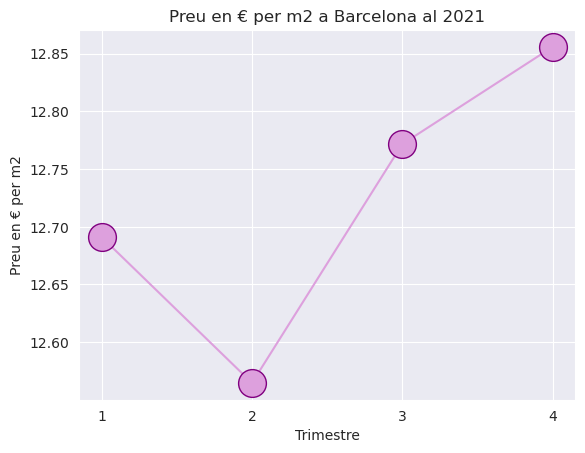

In [67]:
# Dues variables numèriques (Any o Trimestre i Preu)
plt.plot(data.loc[data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'].groupby('Trimestre')['Preu'].mean(),marker = 'o', ms = 20,color='plum',mec = 'purple')
plt.xticks([1, 2, 3, 4], ['1', '2', '3', '4'])
plt.xlabel('Trimestre')
plt.ylabel('Preu en € per m2')
plt.grid(True)
plt.title('Preu en € per m2 a Barcelona al 2021')
plt.savefig("preu_per_m2_2021.png", dpi=300) 

Segons aquesta distribució del preu per m2/mes a la ciutat de Barcelona, sembla que la millor època per buscar un lloguer l'any 2021 va ser durant els mesos d'abril, maig i juny (segon trimestre), on el preu arriba al nivell més baix quedant una mica per sobre dels 12,55 euros m2/mes. Tots aquells que van buscar un lloguer cap a finals d'any van tenir els preus més cars de mitjana.

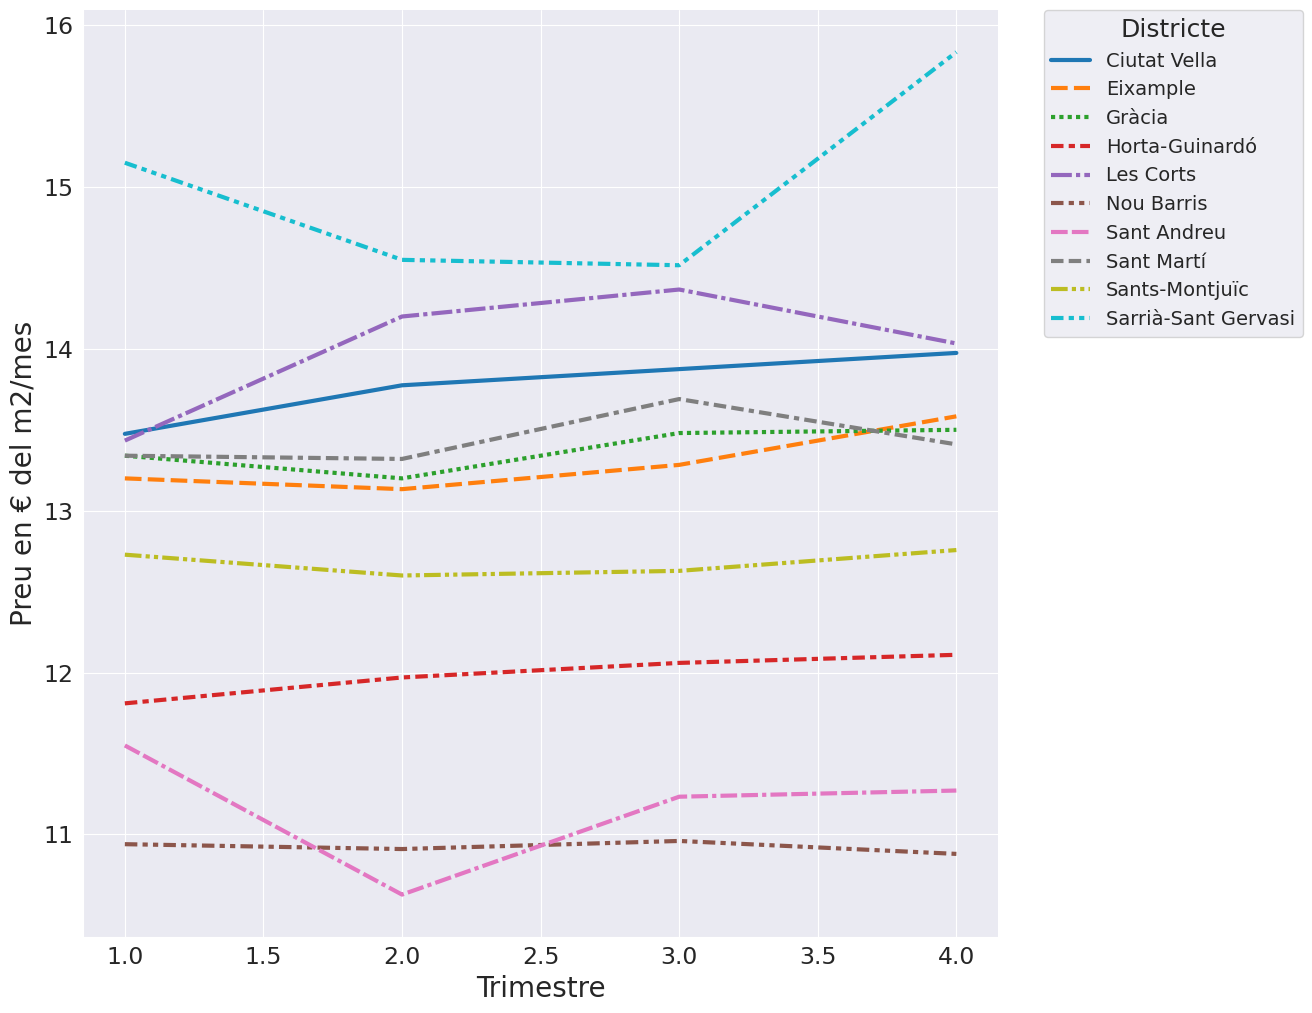

In [68]:
# Tres variables (Barri o Districte, Trimestre i Preu)
k =sns.relplot(data=data.loc[data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'].pivot_table('Preu', 'Trimestre', 'Nom_Districte'), kind='line',linewidth = 3, height=10)
k._legend.remove()
plt.ylabel('Preu en € del m2/mes', fontsize=20)
plt.xlabel('Trimestre', fontsize=20)
plt.tick_params(labelsize=17)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Districte', fontsize='14', title_fontsize='18')

#desar l'imatge
plt.savefig('Preu_trimestre_m2_mes_districte.jpg', bbox_inches='tight')

Seguint amb el comentari de la gràfica anterior, podem dir que la baixada al preu mitjà del m2/mes a la ciutat de Barcelona durant l'any 2021 ve motivada especialment per la baixa del preu al districte de Sant Andreu durant aquesta època de l'any , sent fins i tot inferior aquest preu al del districte de Nou Barrís que té preus més baixos al llarg de tot l'any. Aquesta gràfica és interessant, ja que podem veure que a finals d'any a tots els districtes hi ha una tendència a l'alça del preu més o menys moderada (sent molt alta al districte de Sarrià-Sant Gervasi), excepte als districtes de Sant Martí i Les Corts.

Exercici 2
Exporta els gràfics com imatges. Cadascun dels gràfics ha sigut exportat abans: 

plt.savefig("Nombre_barris_per_districte.jpg",bbox_inches='tight' )
plt.savefig("distribucio_preu_mitja.png", dpi=300)  
plt.savefig("Preu_lloger_mensual_per_districte.jpg",bbox_inches='tight')
plt.savefig("preu_per_m2_2021.png", dpi=300) 
plt.savefig('Preu_trimestre_m2_mes_districte.jpg', bbox_inches='tight')
plt.savefig('preu_max_per_mes_per_barri.jpg', bbox_inches='tight')
plt.savefig('Preu_maxim_m_per_barri.jpg', bbox_inches='tight')

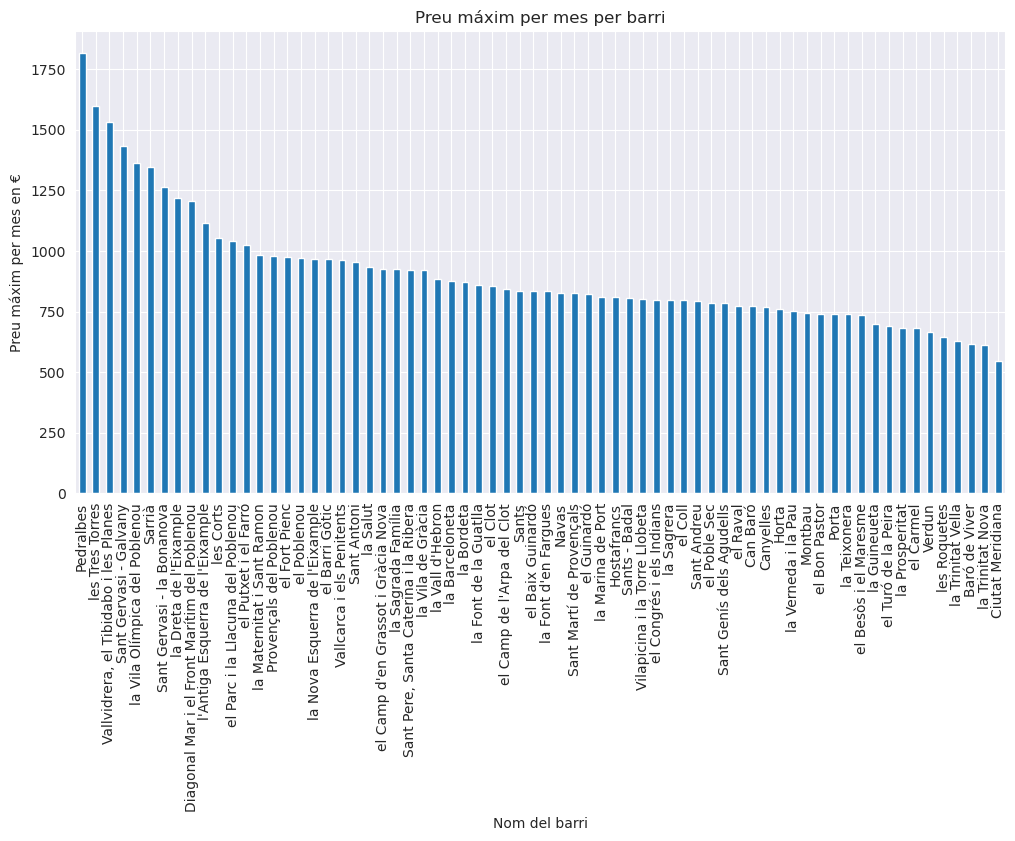

In [71]:
#Exercici 3
# Proposa alguna visualització que creguis que pot resultar interessant
plt.figure(figsize=(12,6))
data.loc[data.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)'].groupby(['Nom_Barri']).max('Preu').sort_values('Preu', ascending=False)['Preu'].plot.bar()
plt.title('Preu máxim per mes per barri')
plt.tick_params(labelsize=10)
plt.xlabel('Nom del barri')
plt.ylabel('Preu máxim per mes en €')
# Desar l'imatge imagen
plt.savefig('preu_max_per_mes_per_barri.jpg', bbox_inches='tight')

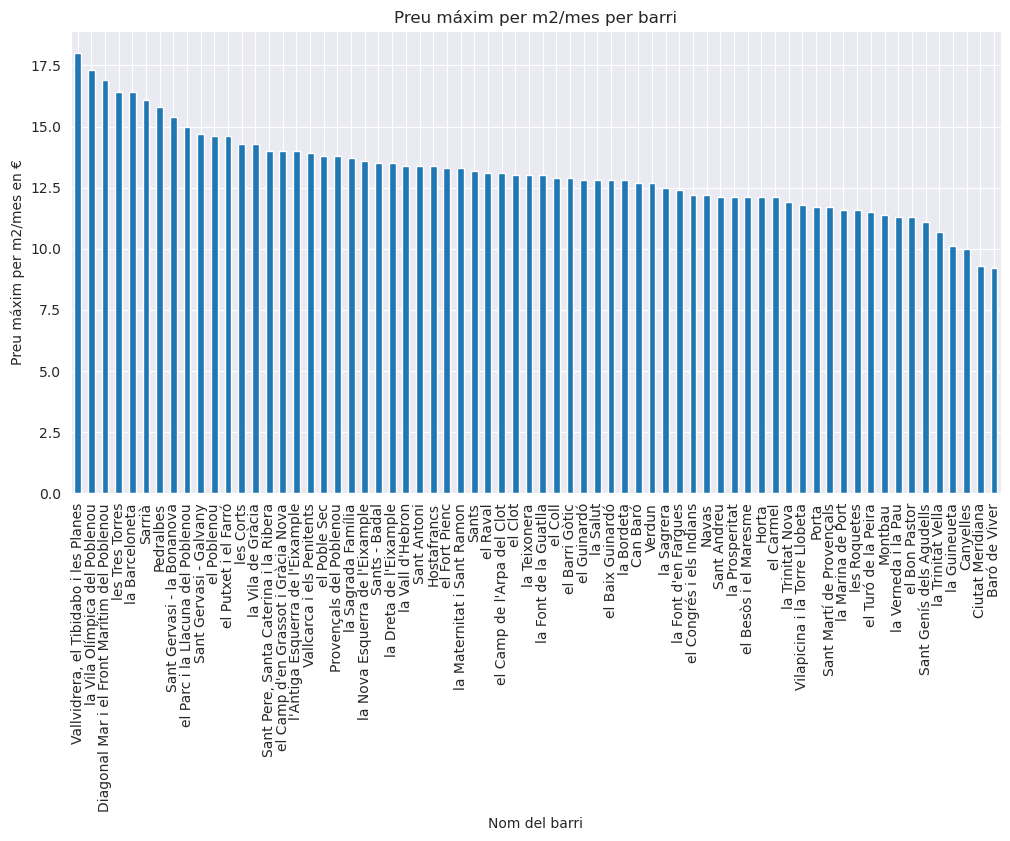

In [72]:
plt.figure(figsize=(12,6))
data.loc[data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'].groupby(['Nom_Barri']).max('Preu').sort_values('Preu', ascending=False)['Preu'].plot.bar()
plt.title('Preu máxim per m2/mes per barri')
plt.tick_params(labelsize=10)
plt.xlabel('Nom del barri')
plt.ylabel('Preu máxim per m2/mes en €')
# desar l'imatge
plt.savefig('Preu_maxim_m_per_barri.jpg', bbox_inches='tight')

En aquest cas, les 2 gràfiques ens mostren els preus màxims per barri, tant en preu per mes com en preu per m2/mes. Mentre que a la primera els preus màxims els trobem al barri de Pedralbes, a la gràfica del preu màxim m2/mes aquest barri el trobem a la setena posició.

Les conclusions, i sense disposar de la informació de la mitjana dels m2 per habitatge per cadascun dels barris, és que és possible que aquesta mitjana sigui més alta al barri de Pedralbes que al barri de Vallvidrera, el Tibidabo i els Plans.